In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
url ='https://raw.githubusercontent.com/TheEconomist/big-mac-data/master/output-data/big-mac-adjusted-index.csv'
df = pd.read_csv(url, parse_dates = ['date'])
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
0,2011-07-01,ARG,ARS,Argentina,20.00,4.132500,4.839685,9138.177,3.149757,1.011,0.475,0.850,0.906,0.946
1,2011-07-01,AUS,AUD,Australia,4.56,0.922382,4.943724,55589.549,5.792526,0.117,-0.181,0.027,0.059,0.081
2,2011-07-01,BRA,BRL,Brazil,9.50,1.541600,6.162429,10816.487,3.245241,1.485,0.823,1.286,1.356,1.405
3,2011-07-01,GBR,GBP,Britain,2.39,0.614137,3.891637,36119.846,4.684831,0.087,-0.202,0.000,0.031,0.052
4,2011-07-01,CAN,CAD,Canada,4.73,0.945850,5.000793,46214.914,5.259173,0.244,-0.087,0.145,0.180,0.204


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           665 non-null    datetime64[ns]
 1   iso_a3         665 non-null    object        
 2   currency_code  665 non-null    object        
 3   name           665 non-null    object        
 4   local_price    665 non-null    float64       
 5   dollar_ex      665 non-null    float64       
 6   dollar_price   665 non-null    float64       
 7   GDP_dollar     665 non-null    float64       
 8   adj_price      665 non-null    float64       
 9   USD            665 non-null    float64       
 10  EUR            665 non-null    float64       
 11  GBP            665 non-null    float64       
 12  JPY            665 non-null    float64       
 13  CNY            665 non-null    float64       
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 72.9+ KB


In [4]:
#เอาข้อมูลปี2019 ละเรียงจากเดือน1
df = df[(df['date'].dt.year==2019) & (df['date'].dt.month==1)]
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
554,2019-01-01,ARG,ARS,Argentina,75.00,37.455000,2.002403,14462.920,3.165211,-0.419,-0.434,-0.338,-0.261,-0.396
555,2019-01-01,AUS,AUD,Australia,6.10,1.401640,4.352045,55692.730,4.945273,-0.192,-0.213,-0.080,0.028,-0.160
556,2019-01-01,BRA,BRL,Brazil,16.90,3.717950,4.545516,9895.765,2.968028,0.406,0.370,0.601,0.789,0.463
557,2019-01-01,GBR,GBP,Britain,3.19,0.783208,4.072992,39800.274,4.259130,-0.122,-0.145,0.000,0.117,-0.087
558,2019-01-01,CAN,CAD,Canada,6.77,1.331400,5.084873,45094.605,4.487708,0.040,0.013,0.185,0.323,0.082


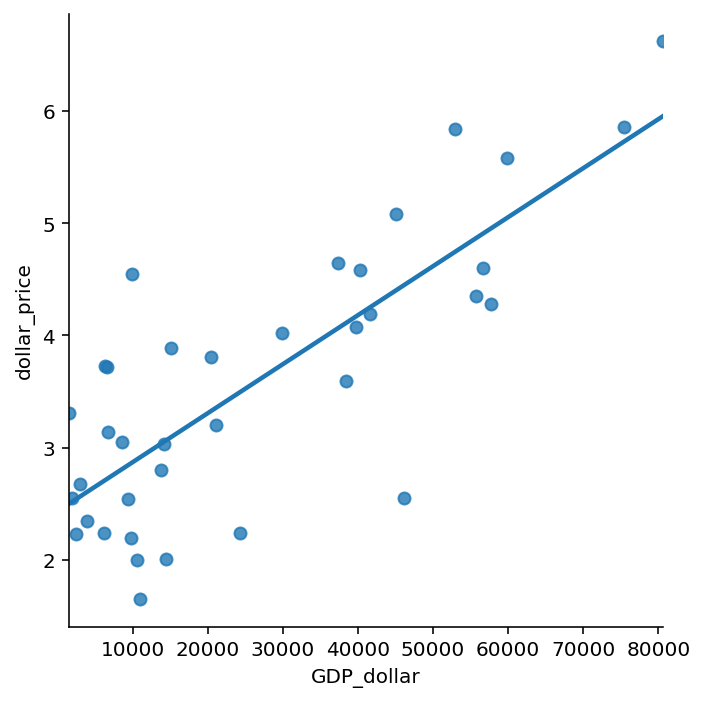

In [5]:
#plot linear model
sns.lmplot(x='GDP_dollar', y='dollar_price', data=df, ci=None)

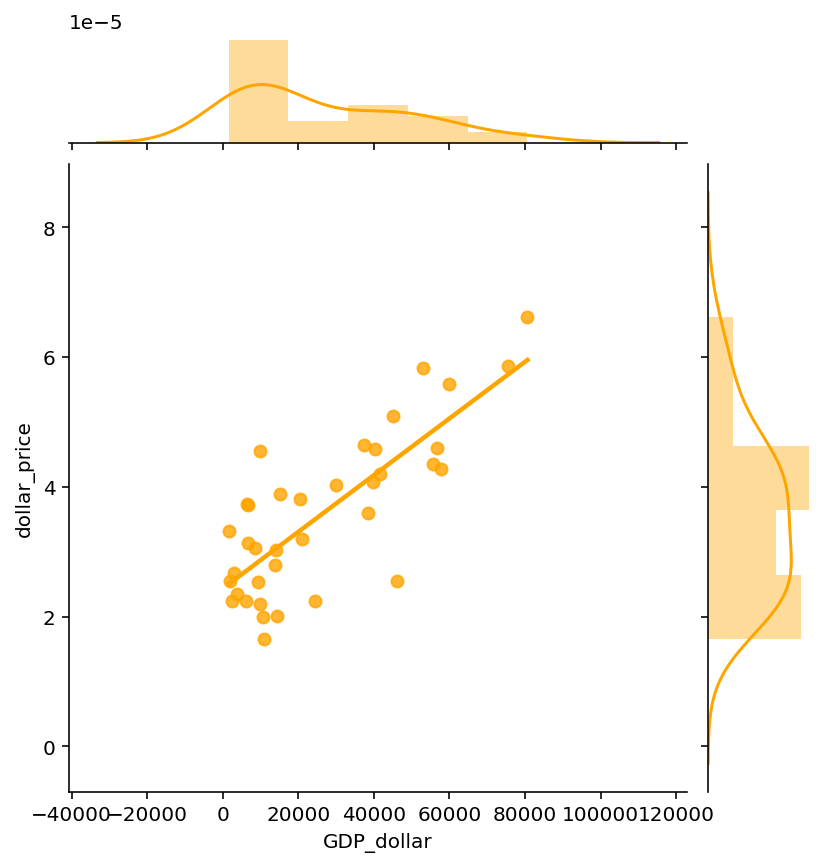

In [6]:
sns.jointplot(x='GDP_dollar', y='dollar_price', data=df,kind='reg', ci=None, color='orange');

**sklearn: LinearRegression**

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
X=df[['GDP_dollar']] #expect 2D array not Series(1D)
y=df.dollar_price

In [10]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
model.score(X,y) #R-squared

0.6312750690042251

In [12]:
model.intercept_

2.432727161471293

In [13]:
model.coef_

array([4.36961383e-05])

In [15]:
#ถ้าประเทศนั้นมี gdp9000 bigmacจะราคาเท่าไหร่
model.intercept_ + model.coef_ * 9000

array([2.82599241])

In [20]:
#ต้องใส่ 2d array
model.predict([[9000]])

array([2.82599241])

In [17]:
#predict 2ค่า
model.predict([[9000],[40000]])

array([2.82599241, 4.18057269])

In [18]:
# 5000-50000 โดนนับทีละ 2500
np.arange(5000,50000,2500)

array([ 5000,  7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000,
       27500, 30000, 32500, 35000, 37500, 40000, 42500, 45000, 47500])

In [19]:
#5000-50000 ห่างเท่าๆกัน 20ตัว
np.linspace(5000,50000,20)

array([ 5000.        ,  7368.42105263,  9736.84210526, 12105.26315789,
       14473.68421053, 16842.10526316, 19210.52631579, 21578.94736842,
       23947.36842105, 26315.78947368, 28684.21052632, 31052.63157895,
       33421.05263158, 35789.47368421, 38157.89473684, 40526.31578947,
       42894.73684211, 45263.15789474, 47631.57894737, 50000.        ])

In [21]:
#ทำเป็นซีรี่บ้าง
s = pd.Series(np.linspace(5000,50000,20))
s

0      5000.000000
1      7368.421053
2      9736.842105
3     12105.263158
4     14473.684211
5     16842.105263
6     19210.526316
7     21578.947368
8     23947.368421
9     26315.789474
10    28684.210526
11    31052.631579
12    33421.052632
13    35789.473684
14    38157.894737
15    40526.315789
16    42894.736842
17    45263.157895
18    47631.578947
19    50000.000000
dtype: float64

In [22]:
model.predict(s.to_frame())

array([2.65120785, 2.75469871, 2.85818956, 2.96168041, 3.06517127,
       3.16866212, 3.27215298, 3.37564383, 3.47913468, 3.58262554,
       3.68611639, 3.78960724, 3.8930981 , 3.99658895, 4.10007981,
       4.20357066, 4.30706151, 4.41055237, 4.51404322, 4.61753407])

In [23]:
dx=pd.DataFrame(np.linspace(5000,50000,20), columns=['gdp'])
dx

,gdp
0,5000.000000
1,7368.421053
2,9736.842105
3,12105.263158
4,14473.684211
5,16842.105263
6,19210.526316
7,21578.947368
8,23947.368421
9,26315.789474


In [24]:
model.predict(dx)

array([2.65120785, 2.75469871, 2.85818956, 2.96168041, 3.06517127,
       3.16866212, 3.27215298, 3.37564383, 3.47913468, 3.58262554,
       3.68611639, 3.78960724, 3.8930981 , 3.99658895, 4.10007981,
       4.20357066, 4.30706151, 4.41055237, 4.51404322, 4.61753407])

**Statmodels: Linear regression**

In [25]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [27]:
model_a = smf.ols(formula='dollar_price ~ GDP_dollar', data=df).fit()

In [28]:
print(model_a.summary())

                            OLS Regression Results                            
Dep. Variable:           dollar_price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     59.92
Date:                Wed, 01 Jul 2020   Prob (F-statistic):           4.34e-09
Time:                        08:39:19   Log-Likelihood:                -41.445
No. Observations:                  37   AIC:                             86.89
Df Residuals:                      35   BIC:                             90.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4327      0.195     12.479      0.0

In [29]:
model_a.pvalues

Intercept     1.915703e-14
GDP_dollar    4.338811e-09
dtype: float64

In [30]:
model.intercept_

2.432727161471293

In [32]:
model.coef_

array([4.36961383e-05])

In [33]:
print(f'{model.coef_[0]:.7f}')

0.0000437
